Ishika Prasad <br>
ip1262@rit.edu

# JUPYTER NOTEBOOK FOR HOMEWORK 2
Segment the foreground from one image and transfer it to another image

In [85]:
import numpy as np
import skimage
from skimage.transform import resize
import matplotlib.pyplot as plt 
from skimage.color import rgb2gray
import scipy
from scipy.ndimage.filters import convolve
from sklearn.cluster import KMeans

from makeLMfilters import makeLMfilters


In [86]:
"""
You are now given a second function tansferImg with the arguments:
    fgs: foreground label ids from clustering
    idxImg: the reshaped indexed image also from clustering
    sImgFilename: source image (a color image to pick pixels from)
    tImgFilename: target image (also a color image to transfer pixels to)
    This function is customized to work for the images provided for the homework
"""
def transferImg(fgs, idxImg, sImgFilename, tImgFilename):

    # Read the images, estimate their dimensions
    sImg = skimage.io.imread(sImgFilename)
    tImg = skimage.io.imread(tImgFilename)
    rows, cols, clrs = sImg.shape

    # Crop the source and indexed images
    idxImg = idxImg[25:rows-25, 25:cols-25]
    sImg = sImg[25:rows-25, 25:cols-25]
    rows, cols, clrs = sImg.shape
    
    # Resize them by so they fit in target file, tImg
    idxImg = resize(idxImg,(int(idxImg.shape[0]/1.5), int(idxImg.shape[1]/1.5)),anti_aliasing=True)
    idxImg = idxImg.astype(np.uint8)
    sImg = 255*resize(sImg, (int(sImg.shape[0]/1.5), int(sImg.shape[1]/1.5)), anti_aliasing=True)
    sImg = sImg.astype(np.uint8)
    rows, cols, clrs = sImg.shape
    
    # Transfer idx onto tImg
    for i in range(rows): 
        for j in range(cols):
            if idxImg[i,j] in fgs:
                # Coordinate offsets from boundary
                iOff = i+200
                jOff = j+100 
                tImg[iOff,jOff,0] = sImg[i,j,0]
                tImg[iOff,jOff,1] = sImg[i,j,1]
                tImg[iOff,jOff,2] = sImg[i,j,2]

    print('***transfer done')
    #plt.imshow(tImg)
    #plt.show()
    return tImg

# Texture Based

In [87]:

#Convert the image to grayscale


#   Define a function segmentImg which takes in an image and returns the foreground labels
#   The arguments to segmentImg are imgFilename
#   and k (the number of clusters)
def segmentImg(imgFilename, k):
    #1. Load and display the image from which you want to segment the foreground from the background
    #  Make sure to convert your image to grayscale after loading
    
    image = plt.imread('gecko.jpg')
    #print(image.shape)
    #plt.imshow(image)
    
    gray = rgb2gray(image)
    #plt.imshow(gray, cmap='gray')
    
    #2. Create an overcomplete bank of filters F (make sure you check the dimensions of the returned array)
    #
    F = makeLMfilters()
    #print(F.shape)

    #3. Convolve the input image with every filter in the bank of filters 
    #   to get a response array 
    #
    test = np.zeros((gray.shape[0],gray.shape[1],F.shape[2]))
    for i in range(48):
        test[:,:,i] = scipy.ndimage.convolve(gray, F[:,:,i])
    #print(test)
    
    #4.Take the absolute values of the responses and 
    #  reshape the reponse tensor into a matrix of size [row*cols, num_filters]
    response = np.absolute(test)
    #print(response)
    X = np.reshape(response, (gray.shape[0]*gray.shape[1], F.shape[2]))
    #print(X.shape)
    #plt.imshow(reshaped_img)
    
    #5. Run k-means on the vectorized reponses X to get a vector of labels (the clusters); 
    #  
    kmeans = KMeans(k, random_state=0)
    kmeans.fit(X)
    k_label = kmeans.labels_
    #print(k_label)
    
    #6. Reshape the label results of k-means so that it has the same size as the input image
    #   Return the label image which we call idx
    idx = np.reshape(k_label, (gray.shape[0], gray.shape[1]))
    
    
    print('***Segmentation done***')
    return idx.astype(np.float)



***Segmentation done***
***transfer done


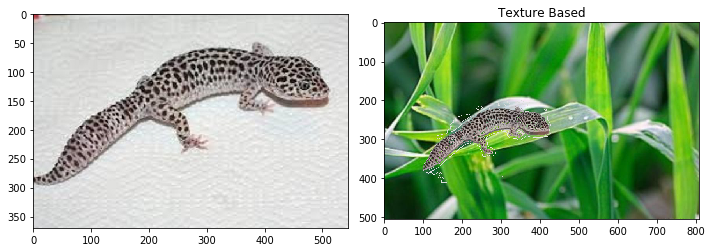

In [88]:
#7. Test your segmentation function with an image file and # of clusters, k
# Below is an example of how to call the transfer function
#
image = plt.imread('gecko.jpg')
idx = segmentImg('gecko.jpg', 6)
# Insert only the numbers that correspond to the foreground labels in the transferImg function
trImg_texture = transferImg([0,2,4,5], idx, 'gecko.jpg', 'bg2.jpg')
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].imshow(image)
ax[1].imshow(trImg_texture)
plt.title("Texture Based")
fig.tight_layout()
plt.show()

# LAB Color Based

In [89]:
#8. Write a new function segmentImgClr with the same arguments as segmentImg
#   But this time, instead of features based on filter responses, just use color
#   Try different colorspaces
def segmentImgClrLab(imgFilename, k):
    image = plt.imread('dog.jpg')
    #print(image.shape)
    #plt.imshow(image)
    
    lab = skimage.color.rgb2lab(image)
    #lab = skimage.color.rgb2hsv(image)

    #plt.imshow(lab)
    #plt.show()
    #print(lab.shape)
    
    X = np.reshape(lab, (lab.shape[0]*lab.shape[1], lab.shape[2]))
    #print(X.shape)
    
    kmeans = KMeans(k, random_state=0)
    kmeans.fit(X)
    k_label = kmeans.labels_
    #print(k_label)
    
    idx = np.reshape(k_label, (lab.shape[0], lab.shape[1]))

    print('***Segmentation done***')
    return idx.astype(np.float)


***Segmentation done***
***transfer done


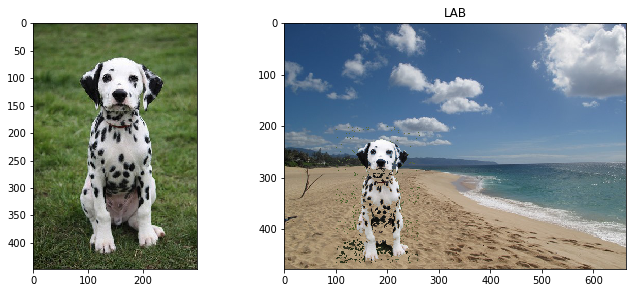

In [90]:
#9. Again test your new color-based segmentation function
#   The same transferImg function should work here also.
image = plt.imread('dog.jpg')
idx = segmentImgClrLab('dog.jpg', 6)
trImg_lab = transferImg([0,2], idx, 'dog.jpg', 'bg.jpg')#with LAB
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].imshow(image)
ax[1].imshow(trImg_lab)
plt.title("LAB")
fig.tight_layout()
plt.show()

# HSV Color Based

In [91]:
#8. Write a new function segmentImgClr with the same arguments as segmentImg
#   But this time, instead of features based on filter responses, just use color
#   Try different colorspaces
def segmentImgClrHsv(imgFilename, k):
    image = plt.imread('cheetah.jpg')
    print(image.shape)
    #plt.imshow(image)
    
    lab = skimage.color.rgb2hsv(image)

    #plt.imshow(lab)
    #plt.show()
    #print(lab.shape)
    
    X = np.reshape(lab, (lab.shape[0]*lab.shape[1], lab.shape[2]))
    #print(X.shape)
    
    kmeans = KMeans(k, random_state=0)
    kmeans.fit(X)
    k_label = kmeans.labels_
    #print(k_label)
    
    idx = np.reshape(k_label, (lab.shape[0], lab.shape[1]))

    print('***Segmentation done***')
    return idx.astype(np.float)


(392, 571, 3)
***Segmentation done***
***transfer done


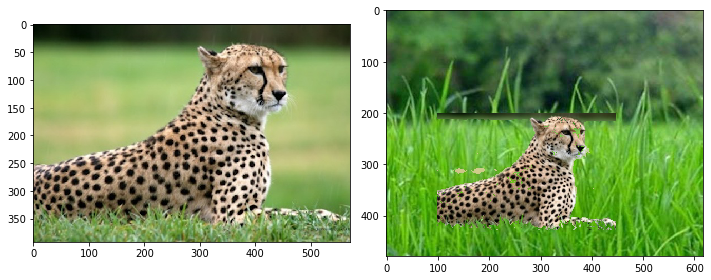

In [92]:
#10 Test with a different colorspace
image = plt.imread('cheetah.jpg')
idx = segmentImgClrHsv('cheetah.jpg', 5)
trImg_hsv = transferImg([1,2,3,4], idx, 'cheetah.jpg', 'bg3.jpg')#with HSV
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].imshow(image)
ax[1].imshow(trImg_hsv)
fig.tight_layout()
plt.show()

# RGB Color Based

In [93]:
#8. Write a new function segmentImgClr with the same arguments as segmentImg
#   But this time, instead of features based on filter responses, just use color
#   Try different colorspaces
def segmentImgClrRgb(imgFilename, k):
    image = plt.imread('zebra.jpg')
    #print(image.shape)
    #plt.imshow(image)
    
    X = np.reshape(image, (image.shape[0]*image.shape[1], image.shape[2]))
    #print(X.shape)
    
    kmeans = KMeans(k, random_state=0)
    kmeans.fit(X)
    k_label = kmeans.labels_
    #print(k_label)
    
    idx = np.reshape(k_label, (image.shape[0], image.shape[1]))

    print('***Segmentation done***')
    return idx.astype(np.float)


***Segmentation done***
***transfer done


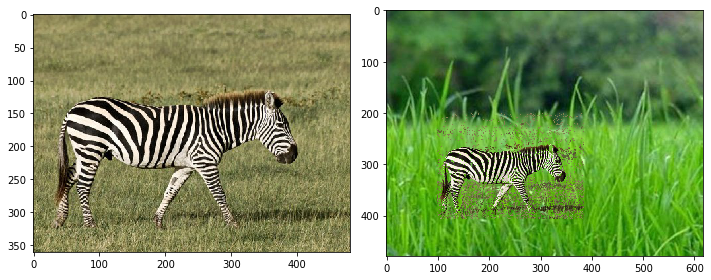

In [94]:
#10 Test with a different colorspace
image = plt.imread('zebra.jpg')
idx = segmentImgClrRgb('zebra.jpg', 6)
trImg_rgb = transferImg([1,2], idx, 'zebra.jpg', 'bg3.jpg')#with RGB
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].imshow(image)
ax[1].imshow(trImg_rgb)
fig.tight_layout()
plt.show()

# Texture based along with Color based 

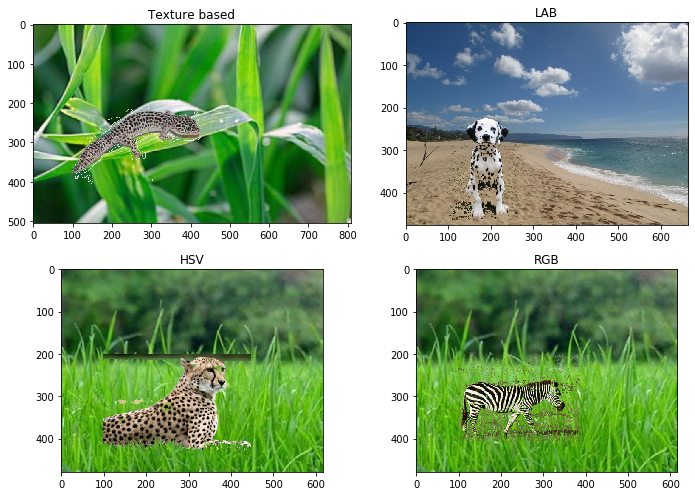

In [95]:
fig, axes = plt.subplots(2, 2, figsize=(10, 7))
ax = axes.ravel()
ax[0].imshow(trImg_texture)
ax[0].set_title("Texture based")
ax[2].imshow(trImg_hsv)
ax[2].set_title("HSV")
ax[1].imshow(trImg_lab)
ax[1].set_title("LAB")
ax[3].imshow(trImg_rgb)
ax[3].set_title("RGB")
plt.savefig("tex_color.jpg")
fig.tight_layout()
plt.show()
